In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.stats import pearsonr


In [146]:
table = pd.read_csv("movie.csv")
table2 =  pd.read_csv("IMDB_movies.csv")
pd.set_option('display.max_columns', None)


feature_table = table[['movie_title','duration', 'movie_imdb_link', 'num_voted_users', 'num_critic_for_reviews', 'num_user_for_reviews','imdb_score', 'movie_facebook_likes','budget', 'gross']]
feature_table2 = table2[['title', 'duration', 'imdb_title_id', 'votes', 'reviews_from_critics', 'reviews_from_users', 'avg_vote', 'budget','worlwide_gross_income' ]]

# change the movie_imdb_link to a imdb_title_id
feature_table["movie_imdb_link"]= feature_table["movie_imdb_link"].str.split("/", n = 5, expand = True)[4]

feature_table



C:\Users\emiel\venv\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\emiel\AppData\Local\Temp/ipykernel_4040/2712138865.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_table["movie_imdb_link"]= feature_table["movie_imdb_link"].str.split("/", n = 5, expand = True)[4]


,movie_title,duration,movie_imdb_link,num_voted_users,num_critic_for_reviews,num_user_for_reviews,imdb_score,movie_facebook_likes,budget,gross
0,Avatar,178.0,tt0499549,886204,723.0,3054.0,7.9,33000,237000000.0,760505847.0
1,Pirates of the Caribbean: At World's End,169.0,tt0449088,471220,302.0,1238.0,7.1,0,300000000.0,309404152.0
2,Spectre,148.0,tt2379713,275868,602.0,994.0,6.8,85000,245000000.0,200074175.0
3,The Dark Knight Rises,164.0,tt1345836,1144337,813.0,2701.0,8.5,164000,250000000.0,448130642.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,tt5289954,8,NaN,NaN,7.1,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,87.0,tt3000844,629,1.0,6.0,7.7,84,NaN,NaN
5039,The Following,43.0,tt2071645,73839,43.0,359.0,7.5,32000,NaN,NaN
5040,A Plague So Pleasant,76.0,tt2107644,38,13.0,3.0,6.3,16,1400.0,NaN
5041,Shanghai Calling,100.0,tt2070597,1255,14.0,9.0,6.3,660,NaN,10443.0


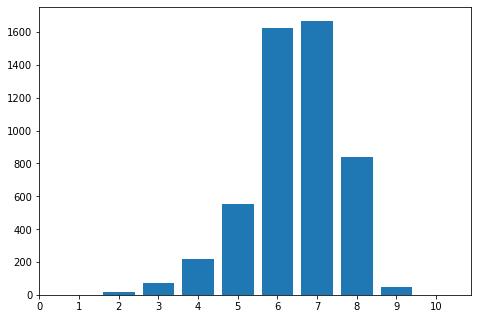

In [55]:

rounded_ratings = [round(x) for x in table.imdb_score]

x = [i+1 for i in range(10)]
y = [rounded_ratings.count(i) for i in x]

#x = table.imdb_score.value_counts().keys()
#y = table.imdb_score.value_counts().values

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(x,y)
plt.xticks(np.arange(0, 11, 1.0))
plt.show()

In [56]:
print(table.imdb_score.describe())
higher_than_9 = table[table['imdb_score'] > 9]
higher_than_9

count    5043.000000
mean        6.442138
std         1.125116
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1937,Color,Frank Darabont,199.0,142.0,0.0,461.0,Jeffrey DeMunn,11000.0,28341469.0,Crime|Drama,...,4144.0,English,USA,R,25000000.0,1994.0,745.0,9.3,1.85,108000
2765,Color,John Blanchard,NaN,65.0,0.0,176.0,Andrea Martin,770.0,NaN,Comedy,...,NaN,English,Canada,NaN,NaN,NaN,179.0,9.5,1.33,0
2824,Color,NaN,53.0,55.0,NaN,2.0,Olaf Lubaszenko,20.0,447093.0,Drama,...,37.0,Polish,Poland,TV-MA,NaN,NaN,3.0,9.1,1.33,0
3207,Color,NaN,53.0,55.0,NaN,2.0,Olaf Lubaszenko,20.0,447093.0,Drama,...,37.0,Polish,Poland,TV-MA,NaN,NaN,3.0,9.1,1.33,0
3466,Color,Francis Ford Coppola,208.0,175.0,0.0,3000.0,Marlon Brando,14000.0,134821952.0,Crime|Drama,...,2238.0,English,USA,R,6000000.0,1972.0,10000.0,9.2,1.85,43000
4409,NaN,John Stockwell,2.0,90.0,134.0,354.0,T.J. Storm,260000.0,NaN,Action,...,1.0,NaN,USA,NaN,17000000.0,2016.0,454.0,9.1,NaN,0


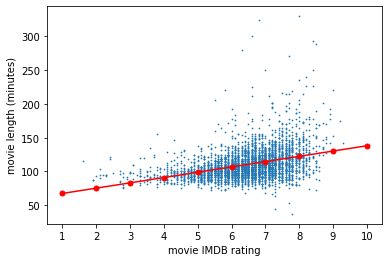

In [57]:
table = table.dropna()

x = table[['imdb_score']]
y = table[['duration']]

plt.xlabel('movie IMDB rating')
plt.ylabel('movie length (minutes)')

lm = linear_model.LinearRegression()
lm.fit(x, y)


pX = pd.DataFrame([1,2,3,4,5,6,7,8,9,10])


plt.plot([1,2,3,4,5,6,7,8,9,10],lm.predict(pX),
        marker='.', markerfacecolor='red', markersize=10, color = 'red')
plt.xticks(np.arange(0, 11, 1.0))


plt.scatter(x, y, s = .5)
plt.show()

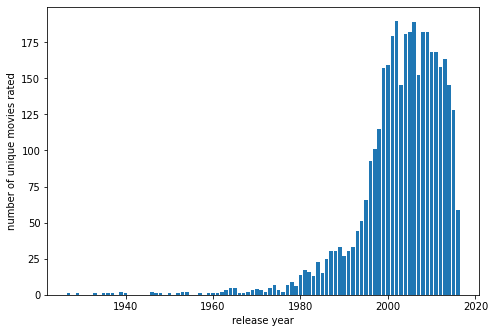

In [58]:

rounded_ratings = [round(x) for x in table.imdb_score]

x = np.unique(table.title_year)[:91]
y = [list(table.title_year.values).count(i) for i in x]

#x = table.imdb_score.value_counts().keys()
#y = table.imdb_score.value_counts().values

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

plt.xlabel('release year')
plt.ylabel('number of unique movies rated')

ax.bar(x,y)
plt.show()

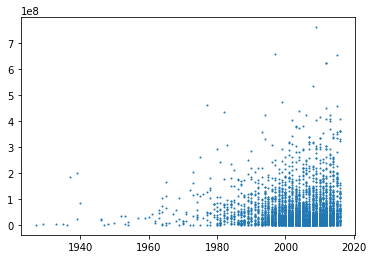

In [89]:


x = table.title_year
y = table.gross



plt.scatter(x, y, s = 1)
plt.show()

<h2> Correlation between columns and imdb_score: </h2>

In [60]:
l = ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']
for col in l:
    print(f"{col}: {pearsonr(table[col], table.imdb_score)[0]}")

num_critic_for_reviews: 0.34788563860428
duration: 0.36622101735707996
director_facebook_likes: 0.19231354864275152
actor_3_facebook_likes: 0.0655436116814746
actor_1_facebook_likes: 0.09359717972632989
gross: 0.21473971217602245
num_user_for_reviews: 0.32500259249589547
budget: 0.02918972245464242
title_year: -0.13498183027686017
actor_2_facebook_likes: 0.10237203904135828
imdb_score: 1.0
aspect_ratio: 0.029979332426114308
movie_facebook_likes: 0.28115499147171563


<h1> meetniveaus: </h1>

    







    

num_voted_users:
num_critic_for_reviews: 
num_user_for_reviews: 
budget: 
imdb_score: 
movie_facebook_likes: 
gross:
    

<h2> Correlation between columns and movie gross: </h2>

In [88]:
table = table.dropna()

l = ['num_voted_users','num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']



for col in l:
    print(f"{col}: {pearsonr(table[col], table.gross)[0]}")
    
    



num_voted_users: 0.6249487454565548
num_critic_for_reviews: 0.4641870340045625
duration: 0.2457261977705955
director_facebook_likes: 0.1383505899808125
actor_3_facebook_likes: 0.29986381633000814
actor_1_facebook_likes: 0.1440095703653353
gross: 1.0
num_user_for_reviews: 0.544673830198518
budget: 0.099496423270246
title_year: 0.05480795298930051
actor_2_facebook_likes: 0.2528419264768792
imdb_score: 0.21473971217602245
aspect_ratio: 0.06394585497812032
movie_facebook_likes: 0.3669326605067953
